# <center> <b>CLASSIFICATION ALGORITHM</b> </center>

### Problem Statement:
The problem at hand involves classifying the Iris flower dataset into distinct categories, Setosa, Versicolour, and Virginica, based on their morphological features, namely Sepal Length, Sepal Width, Petal Length, and Petal Width. The objective is to employ various classification algorithms to accurately predict the species of Iris flowers using their measured attributes.

### Objective:
The objective is to explore the effectiveness of different classification algorithms in accurately predicting the species of Iris flowers based on their morphological characteristics. Specifically, the goals are:

1.Utilize popular classification algorithms such as Logistic Regression, Decision Tree, Random Forest, K Nearest Neighbors, and Naive Bayes to train predictive models on the Iris dataset.

2.Evaluate the performance of each algorithm using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

4.Determine the most suitable algorithm for the Iris classification task based on its predictive accuracy and performance metrics.

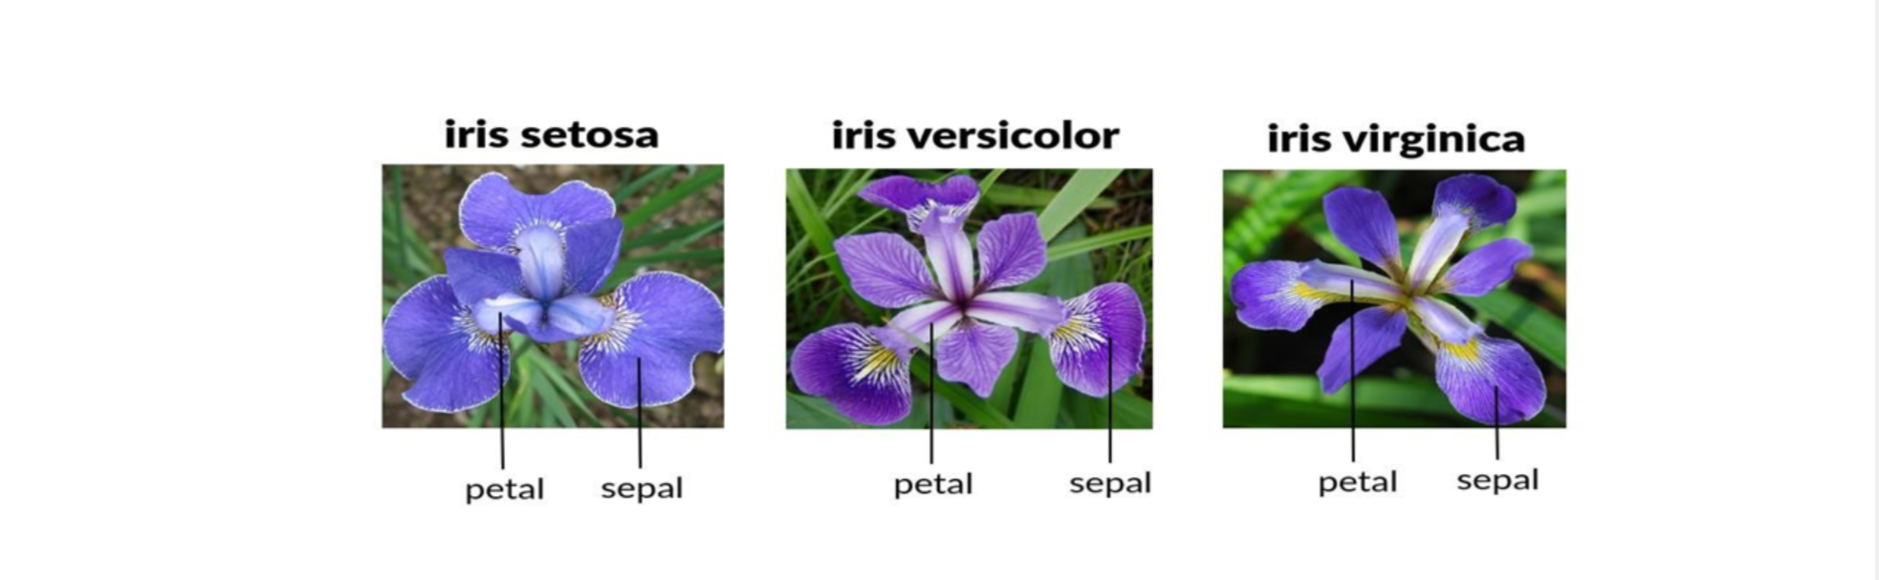

### Importing necessary libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
# Load the Iris dataset
iris_data = load_iris()

In [4]:
#The features (input data) of the Iris dataset, containing measurements of sepal length, sepal width, petal length, and petal width
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
#The target labels (output data) of the Iris dataset, representing the species of each sample.
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### EDA

In [7]:
#Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#Display the last few rows of the dataset
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
#Display concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
#To check if there are any missing values in dataset
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [12]:
#To check if there are any missing values in dataset
df.notnull().sum()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
class                150
dtype: int64

#### Checking for Duplicates

In [13]:
#To check if there are any duplicates in dataset
df.duplicated().sum()

1

#### Check the Shape of Dataset

In [14]:
#To check the shape of a DataFrame df
df.shape

(150, 5)

In [15]:
# Access column names
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

### Data Preprocessing

In [16]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [17]:
# Find unique values in the 'class' column
df['class'].unique()

array([0, 1, 2])

In [18]:
# Group by 'class' column and count occurrences of each class
df.groupby('class').size()

class
0    50
1    50
2    49
dtype: int64

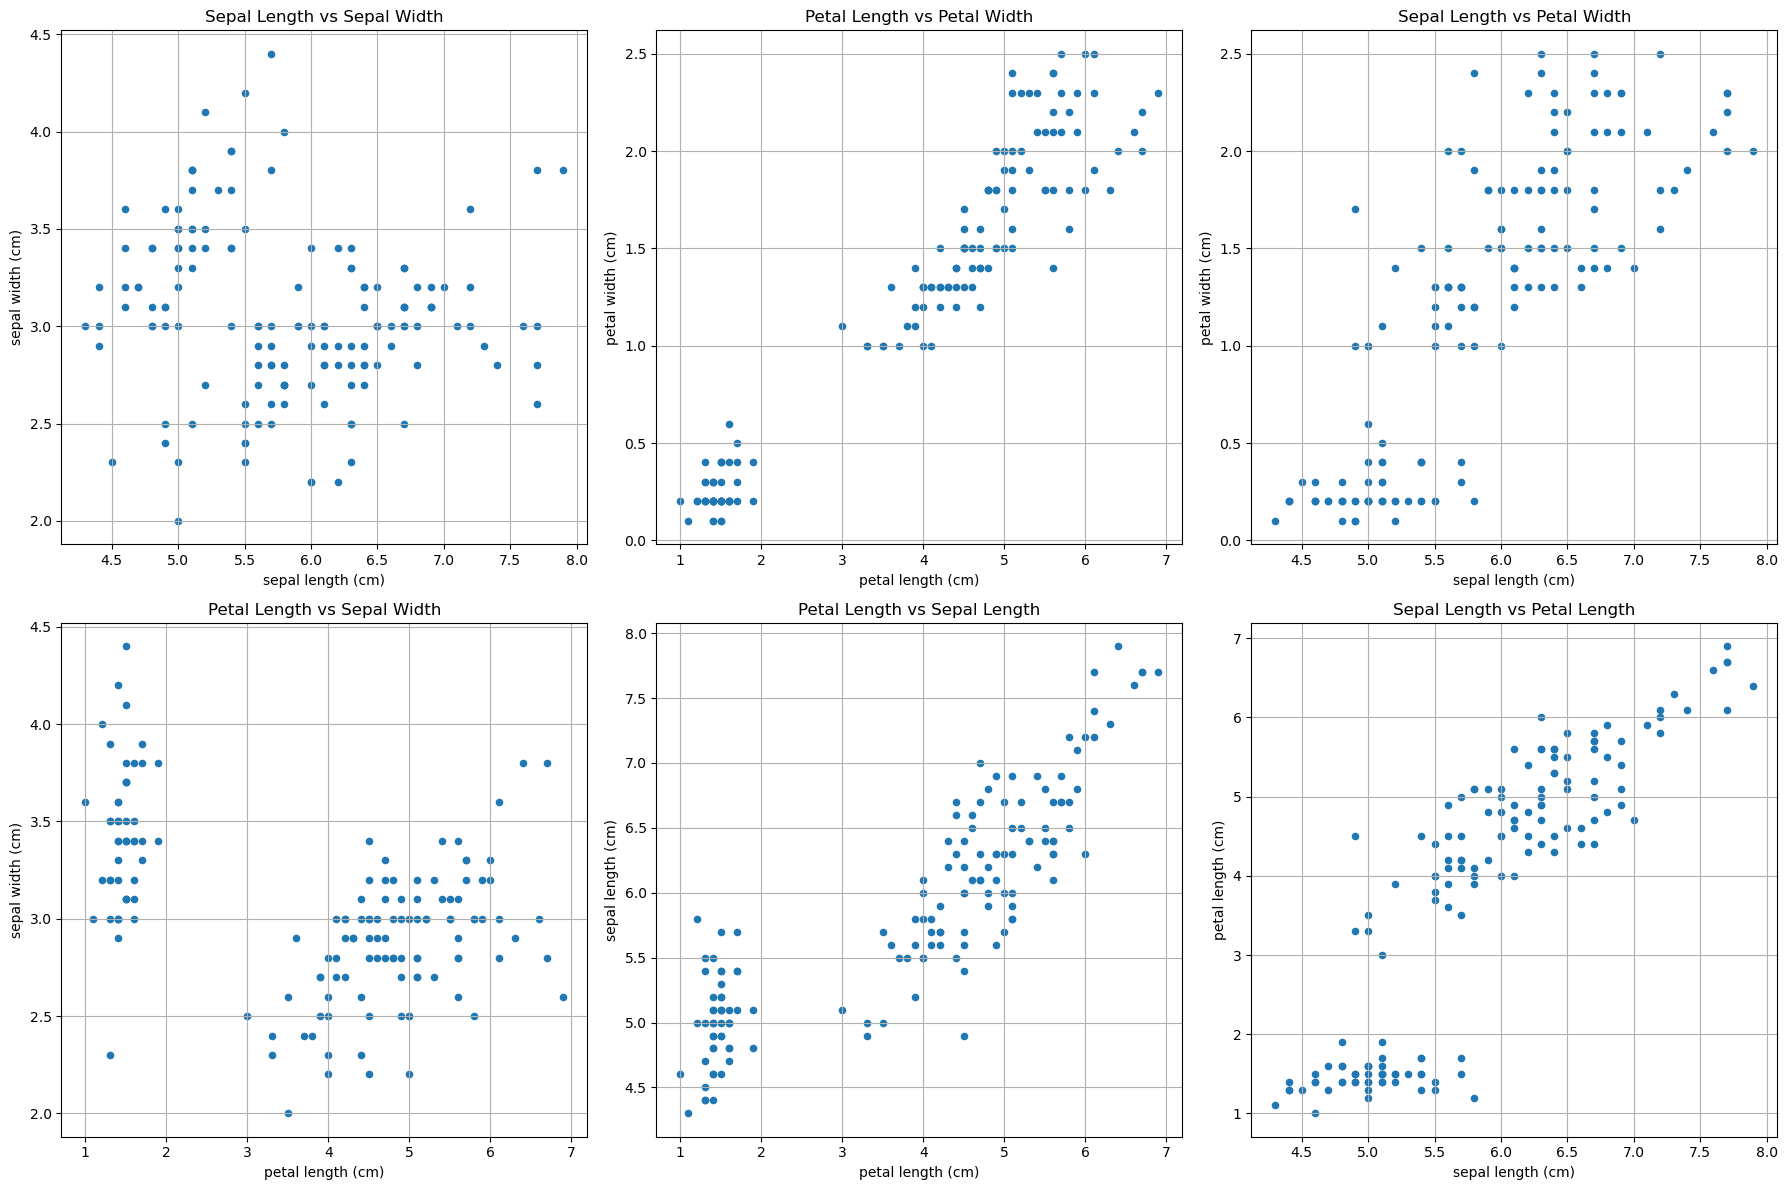

In [19]:
# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot 1: Sepal length vs. Sepal width
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length vs Sepal Width')
axes[0, 0].grid()

# Plot 2: Petal length vs. Petal width
df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=axes[0, 1])
axes[0, 1].set_title('Petal Length vs Petal Width')
axes[0, 1].grid()

# Plot 3: Sepal length vs. Petal width
df.plot(kind='scatter', x='sepal length (cm)', y='petal width (cm)', ax=axes[0, 2])
axes[0, 2].set_title('Sepal Length vs Petal Width')
axes[0, 2].grid()

# Plot 4: Petal length vs. Sepal width
df.plot(kind='scatter', x='petal length (cm)', y='sepal width (cm)', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length vs Sepal Width')
axes[1, 0].grid()

# Plot 5: Petal length vs. Sepal length
df.plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)', ax=axes[1, 1])
axes[1, 1].set_title('Petal Length vs Sepal Length')
axes[1, 1].grid()

# Plot 6: Sepal length vs. Petal length
df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', ax=axes[1, 2])
axes[1, 2].set_title('Sepal Length vs Petal Length')
axes[1, 2].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


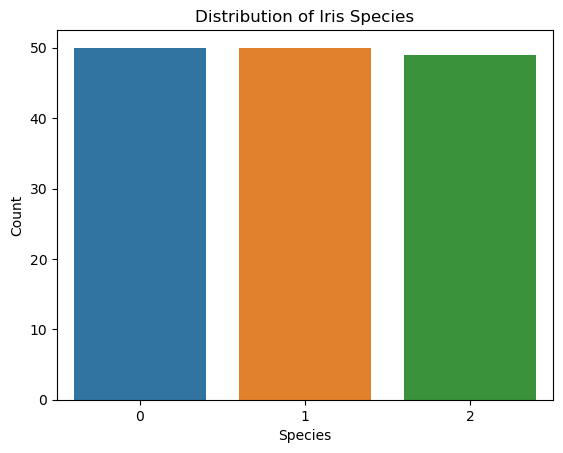

In [20]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

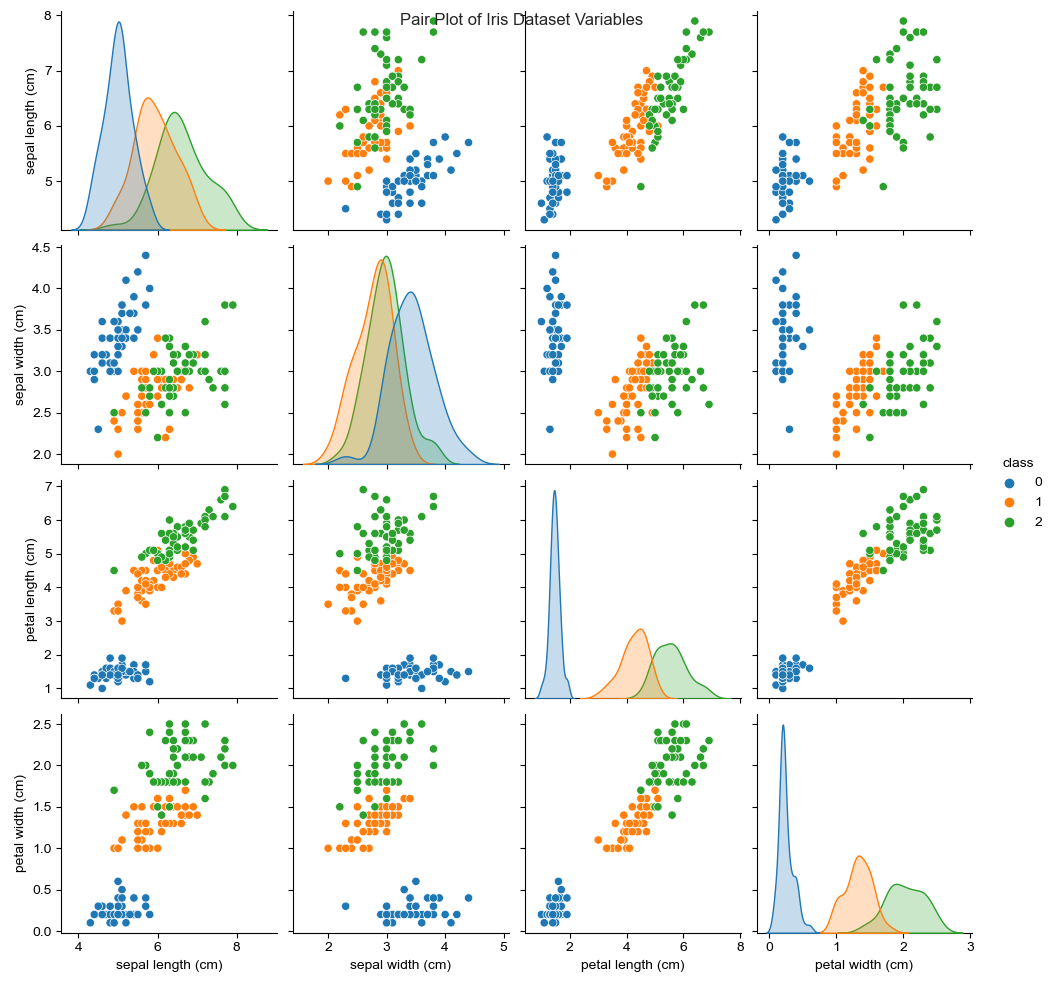

In [21]:
#create a pair plot
sns.pairplot(df,hue='class', palette='tab10')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

The pair plot offers a comprehensive visual overview of the relationships between different pairs of variables (features) in the Iris dataset. Each scatterplot within the grid represents the relationship between two specific variables, such as sepal length, sepal width, petal length, and petal width. The data points in these scatterplots are color-coded based on the species of the iris flower, allowing for easy differentiation and comparison among the three species: Setosa, Versicolour, and Virginica. This visualization helps in identifying patterns, correlations, and potential separations between species based on their morphological features. It also highlights the distinct clusters formed by each species, providing insights into how well the features discriminate between the different iris types. Overall, the pair plot is an effective tool for exploratory data analysis, facilitating a deeper understanding of the dataset's structure and the relationships between its variables.








In [22]:
# Select column names with float64 data type
col_name = df.select_dtypes("float64").columns
col_name 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

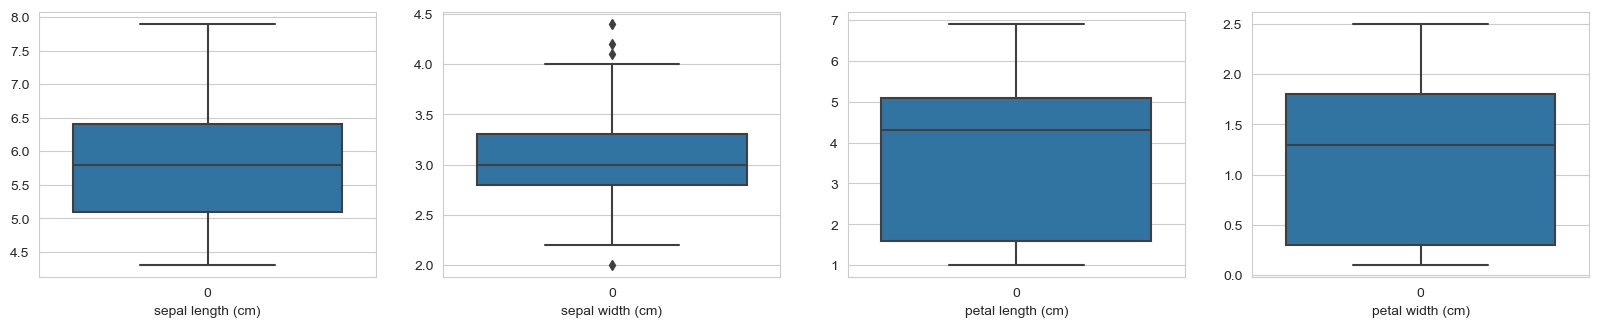

In [23]:
#providing distribution and spread of each feature in the dataset.


#box plot 
fig = plt.figure(figsize=(20,20))
counter = 0

for col in col_name:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1





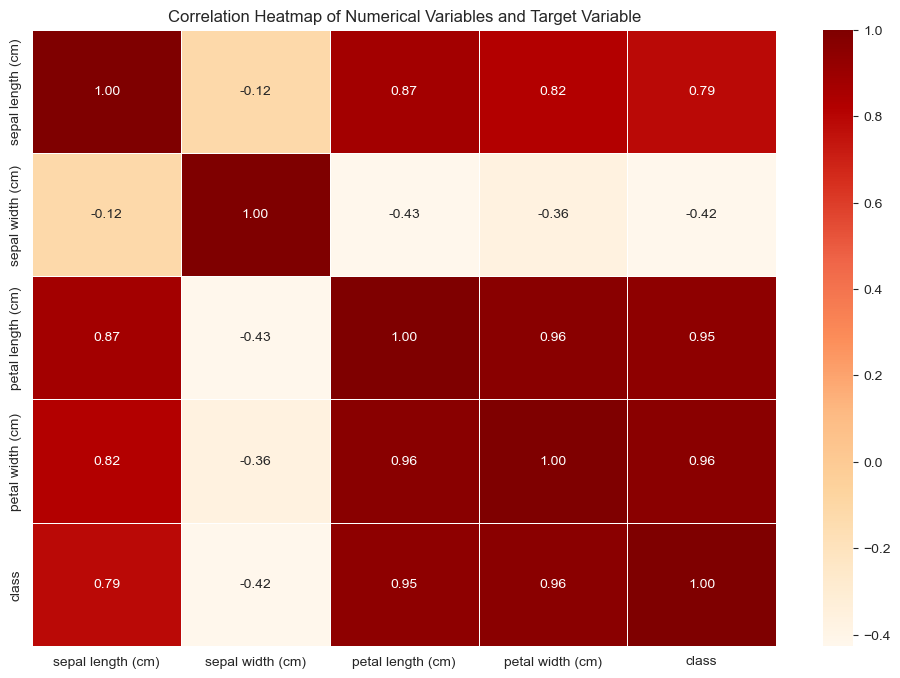

In [24]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

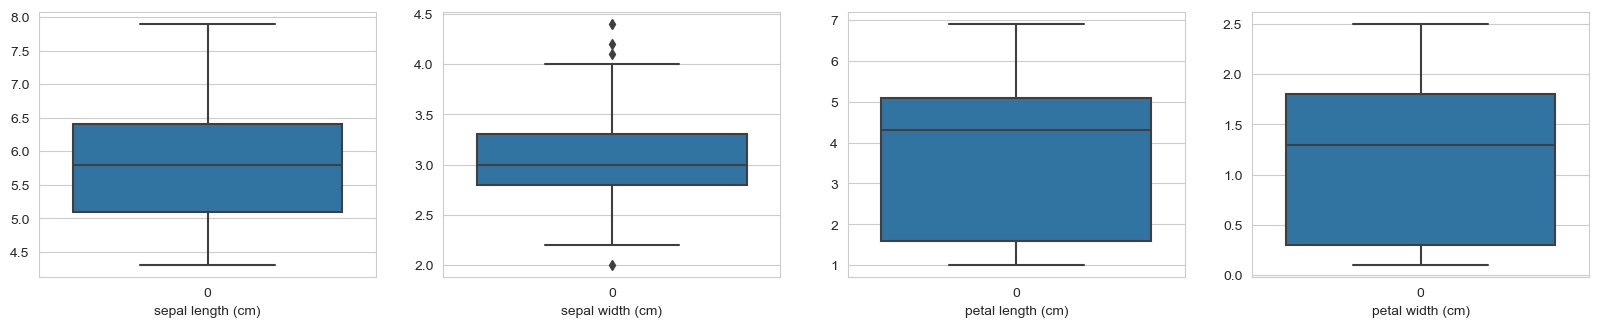

In [25]:

#box plot 
fig = plt.figure(figsize=(20,20))
counter = 0

for col in col_name:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

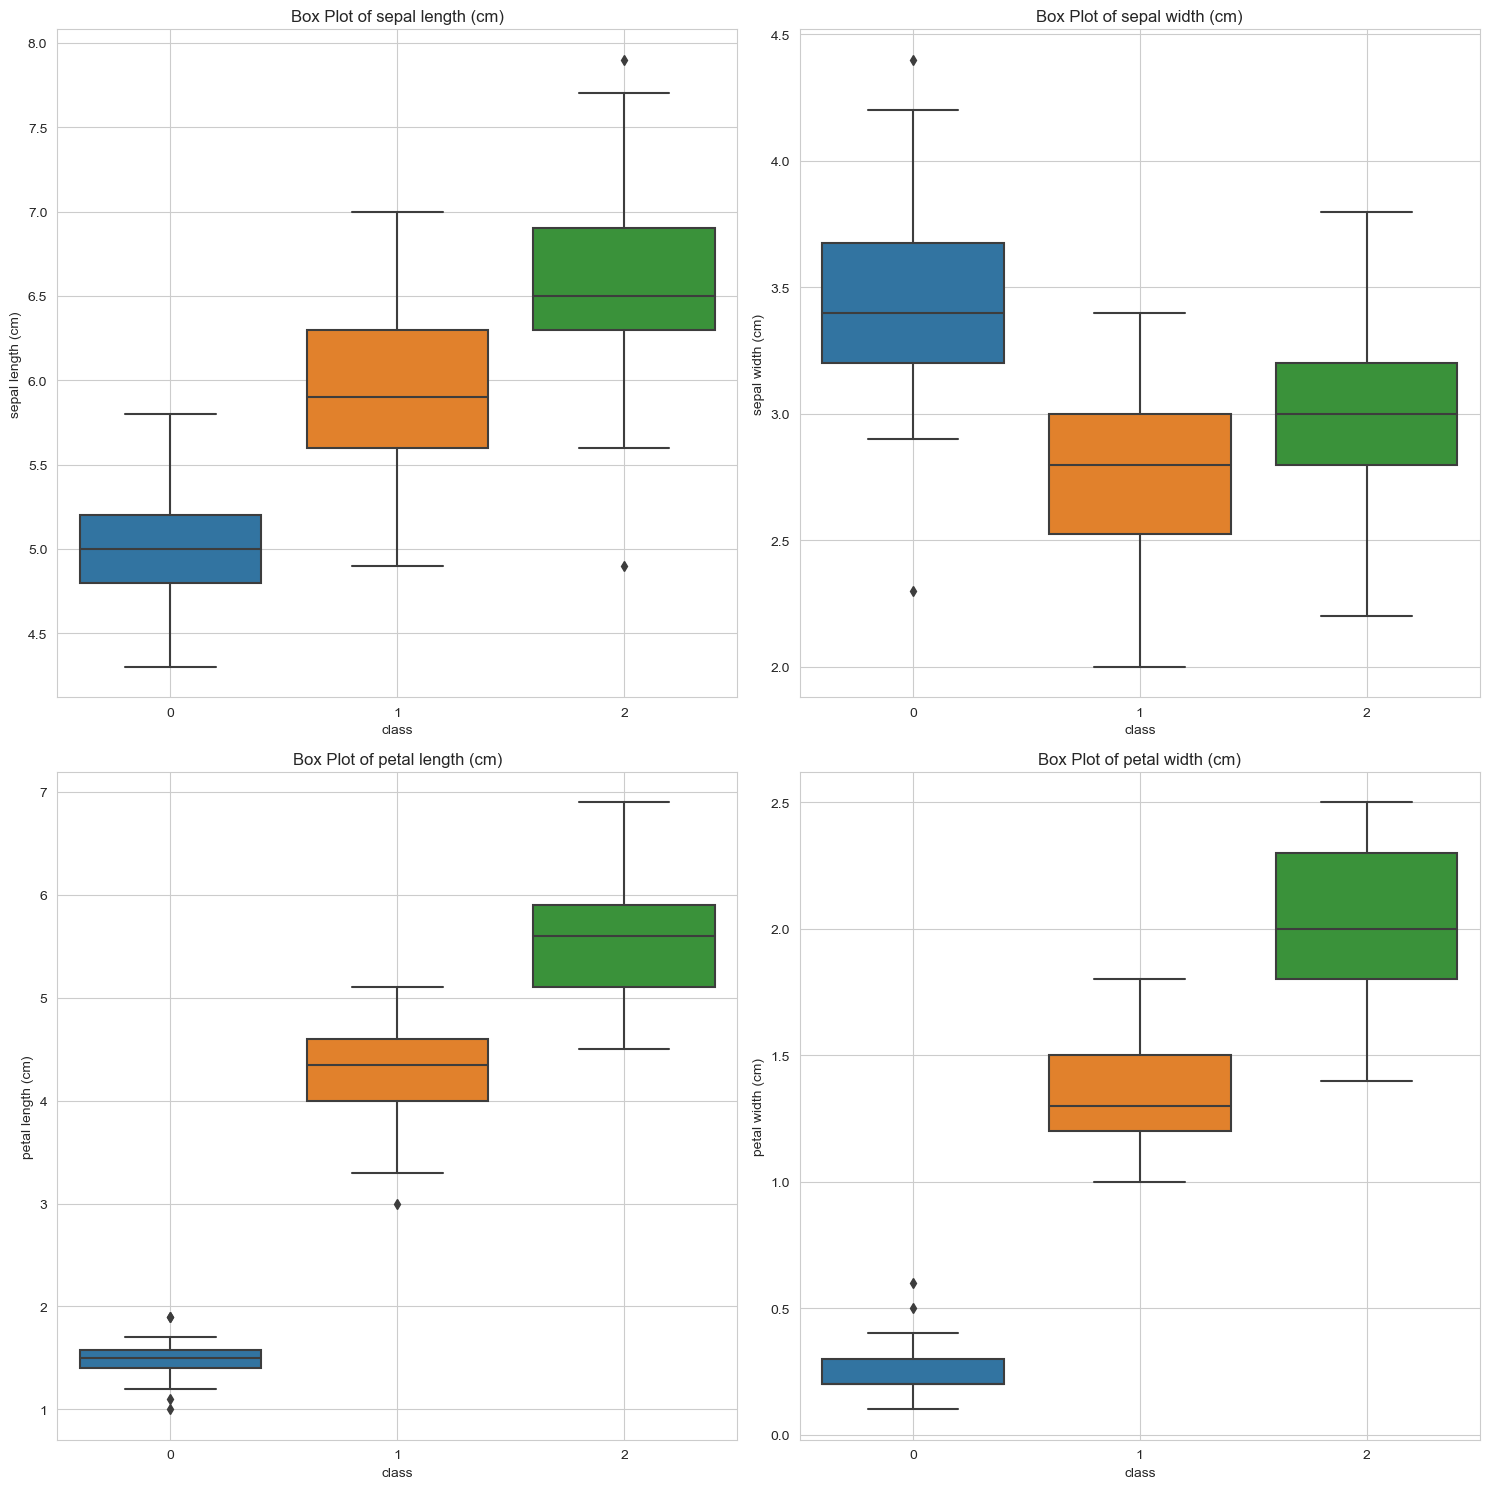

In [26]:
#creates a box plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i, col in enumerate(col_name):
    sns.boxplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

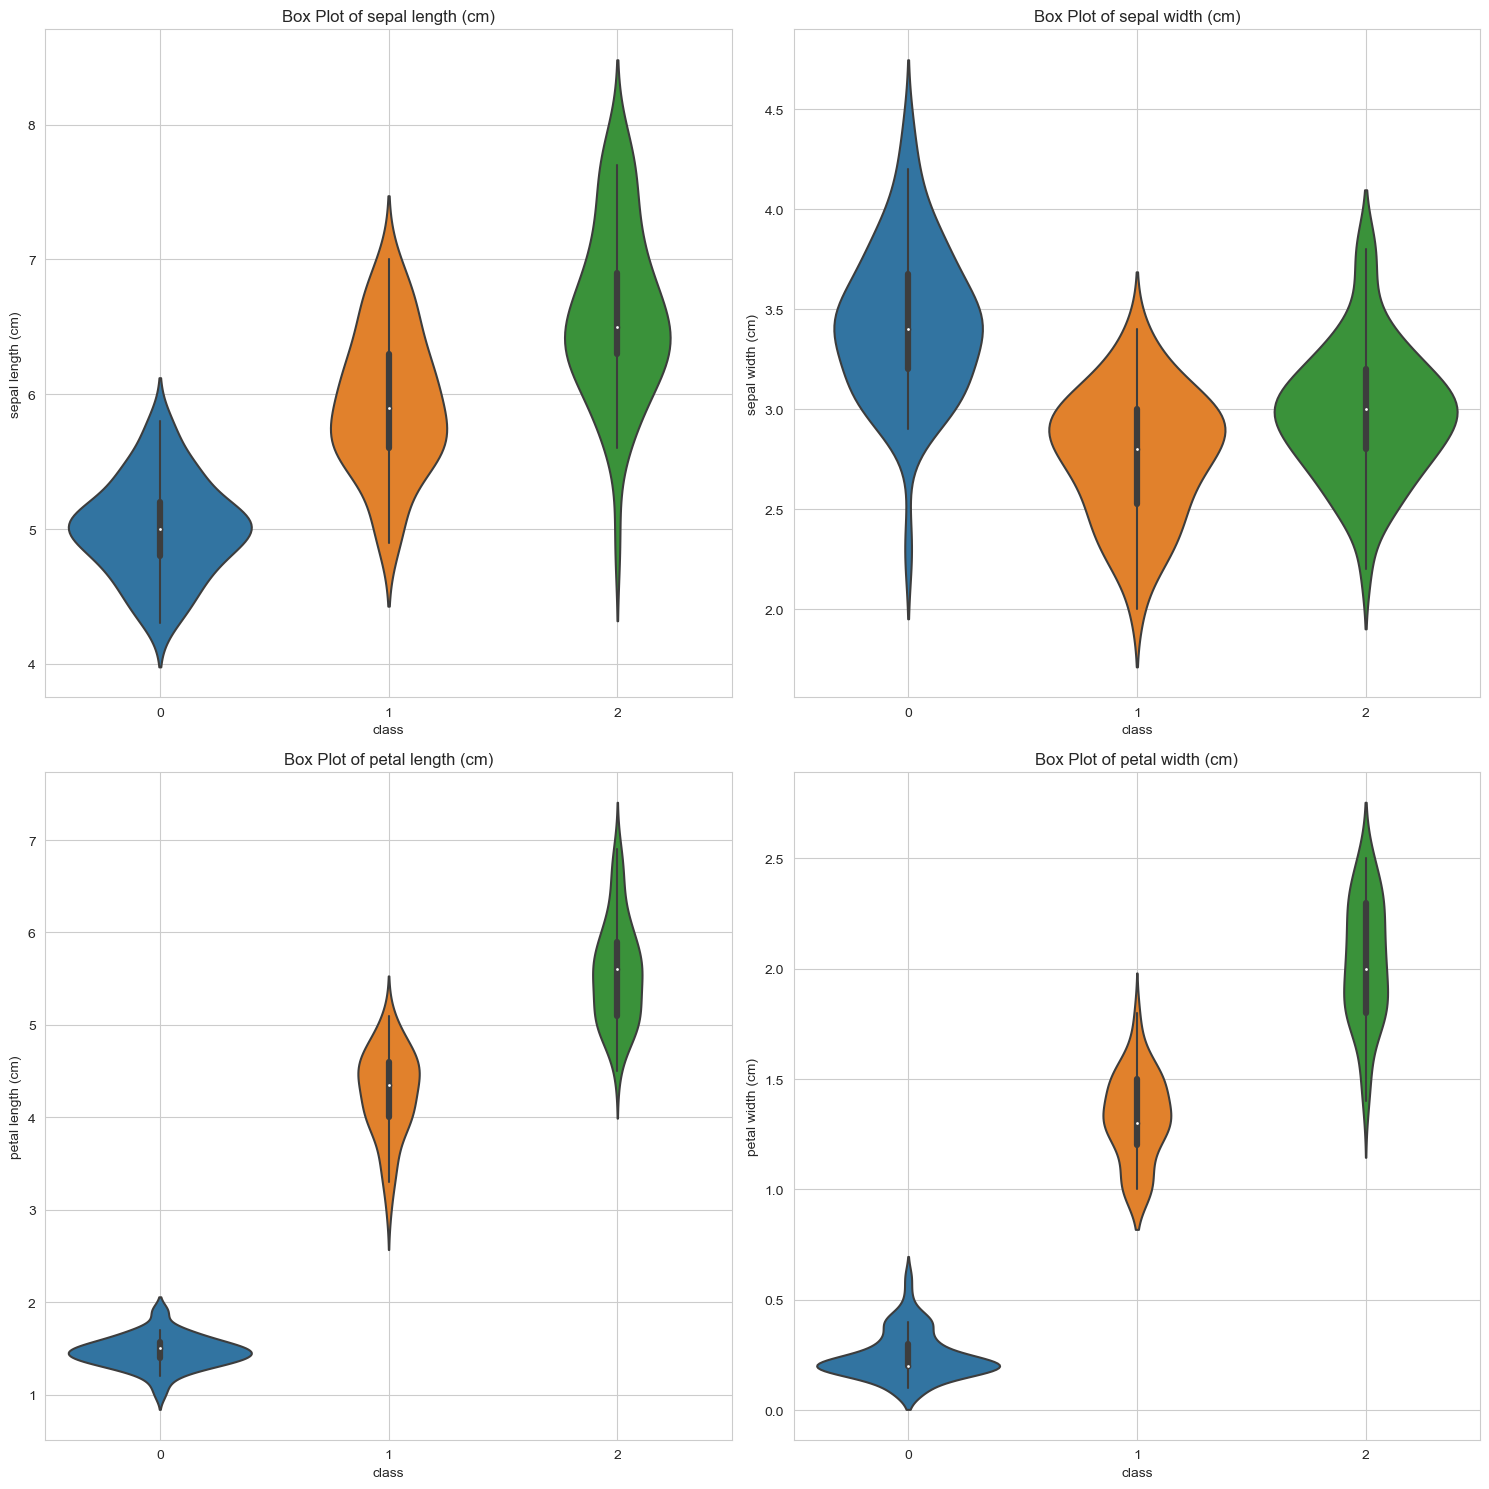

In [27]:
#creates a violin plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, col in enumerate(col_name):
    sns.violinplot(data=df, x='class', y=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Box Plot of {col}')
    axes[i // 2, i % 2].grid(True)
plt.tight_layout()
plt.show()

### Outlier Treatment

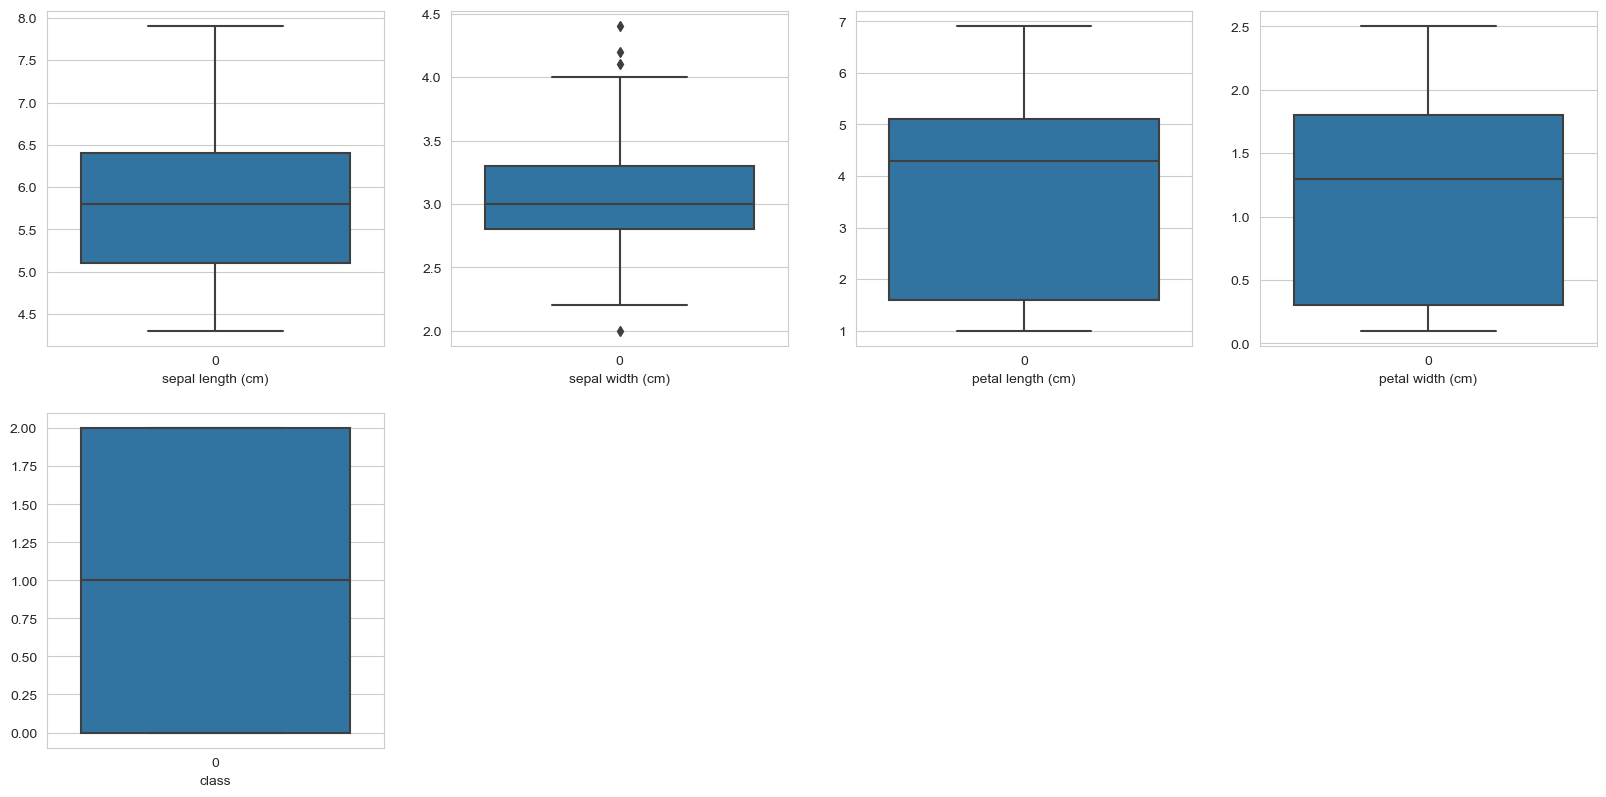

In [28]:
#box plot to identify outliers
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [29]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [30]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

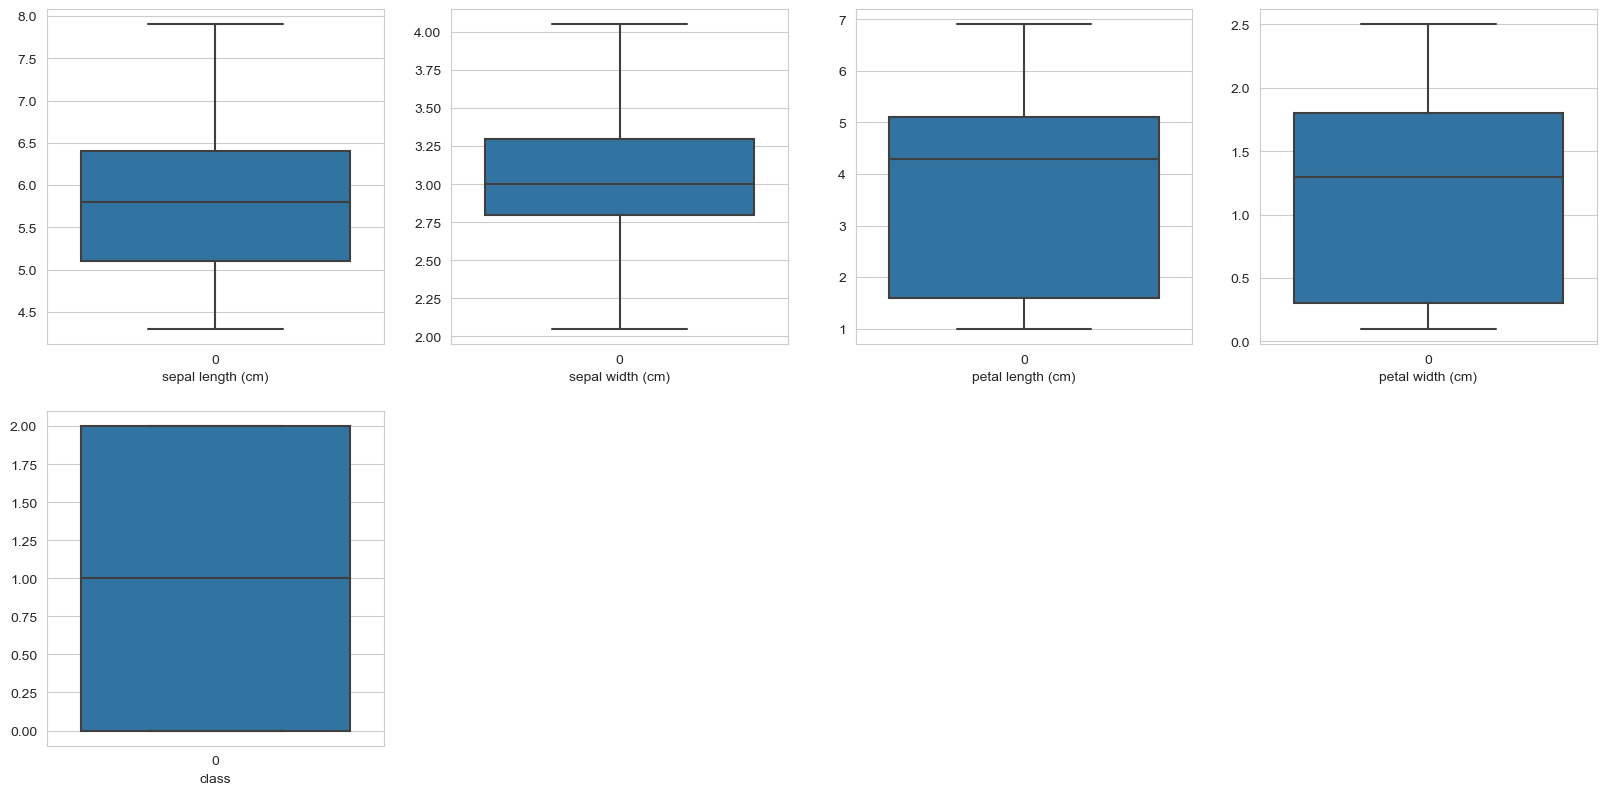

In [31]:
#box plot after outlier treatment
fig = plt.figure(figsize=(20,20))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2.0
145,6.3,2.5,5.0,1.9,2.0
146,6.5,3.0,5.2,2.0,2.0
147,6.2,3.4,5.4,2.3,2.0


In the Iris dataset doesn't require encoding of categorical columns because there are no categorical columns in the dataset. The target variable, representing the species of iris flowers, is already encoded as numerical values (0, 1, 2) corresponding to the three species (Setosa, Versicolor, Virginica).

### Feature Scaling


In [33]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[col_name])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=col_name)

df[col_name] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


### Model Building


In [34]:
x=df.drop('class',axis=1)

In [35]:
y=df['class']

In [36]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667
145,0.555556,0.225,0.677966,0.750000
146,0.611111,0.475,0.711864,0.791667
147,0.527778,0.675,0.745763,0.916667


In [37]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
Name: class, Length: 149, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)


In [39]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

### 1.Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
Logistic_Model = LogisticRegression()
Logistic_Model.fit(x_train, y_train)

LogisticRegression()

In [41]:
Logistic_Model.score(x_test, y_test)

0.9333333333333333

In [42]:
y_PredictedLogistic = Logistic_Model.predict(x_test)
y_PredictedLogistic

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 2., 1., 2., 1., 0., 2., 0., 2.])

In [43]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, y_PredictedLogistic)
cm_logistic

array([[16,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 13]], dtype=int64)

In [44]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_logistic[0, 0]
FP = cm_logistic[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(97.72222222222221, 0.5, 'Truth')

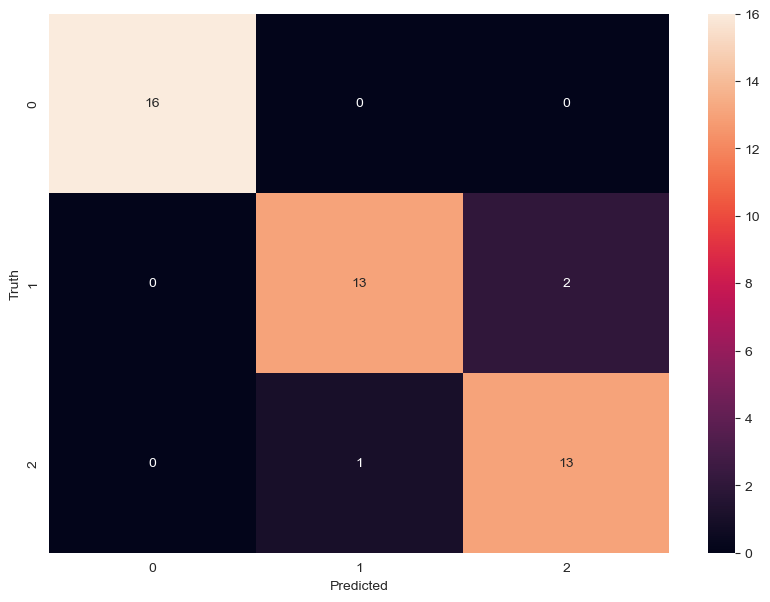

In [45]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_logistic, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
Logistic_Model.score(x_test, y_test)

0.9333333333333333

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_PredictedLogistic)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_PredictedLogistic))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.87      0.90        15
         2.0       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [49]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on test data
probslogistic = Logistic_Model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_log = roc_auc_score(y_test, probslogistic, multi_class='ovr')

print("AUC for logistic Classifier:", auc_log)

AUC for logistic Classifier: 0.9924833589349719


### 2.Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_predictedDecision= decision_model.predict(x_test)
y_predictedDecision

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 2., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [53]:
decision_model.score(x_test, y_test)

0.9777777777777777

In [54]:
#confusion Matrix
cm_decision = confusion_matrix(y_test,y_predictedDecision)
cm_decision

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

In [55]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_decision[0, 0]
FP = cm_decision[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(97.72222222222221, 0.5, 'Truth')

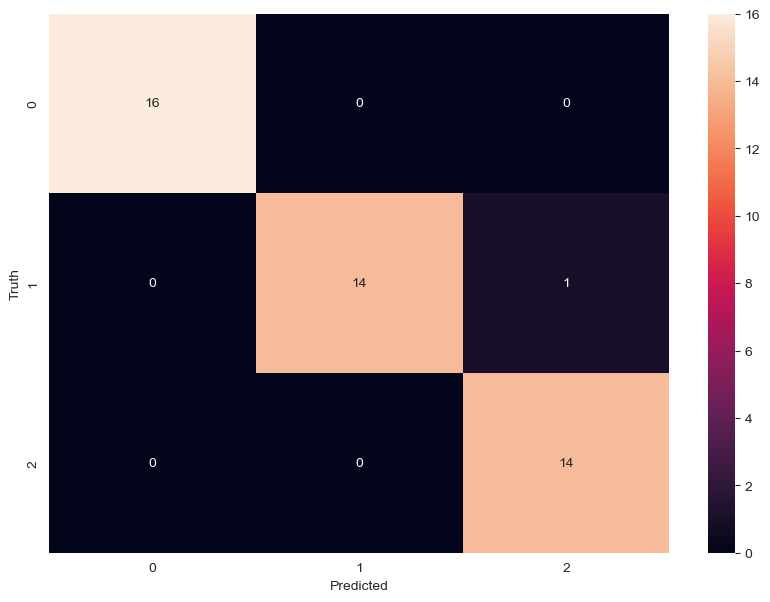

In [56]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_decision, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [57]:
decision_model.score(x_test, y_test)

0.9777777777777777

In [58]:
print(classification_report(y_test, y_predictedDecision))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.93      0.97        15
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



[Text(0.4, 0.9166666666666666, 'x[3] <= 0.292\ngini = 0.667\nsamples = 104\nvalue = [34, 35, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 0.669\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 0.486\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'x[2] <= 0.686\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 0.653\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 0.525\ngini = 0.444\nsamples = 3\nvalue = 

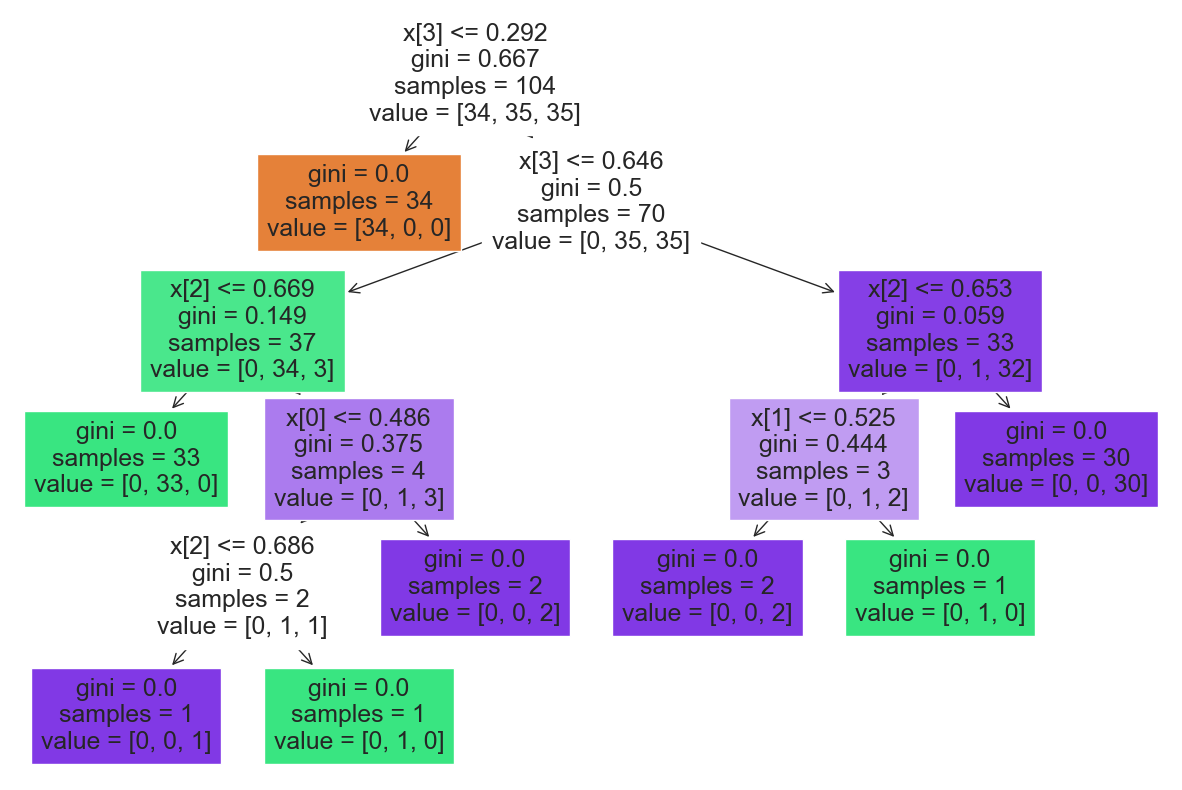

In [59]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model,filled=True)

#### Post Pruning


In [60]:
# post pruning with max_depth=3
decision_model2=DecisionTreeClassifier(max_depth=2)
decision_model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.292\ngini = 0.667\nsamples = 104\nvalue = [34, 35, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

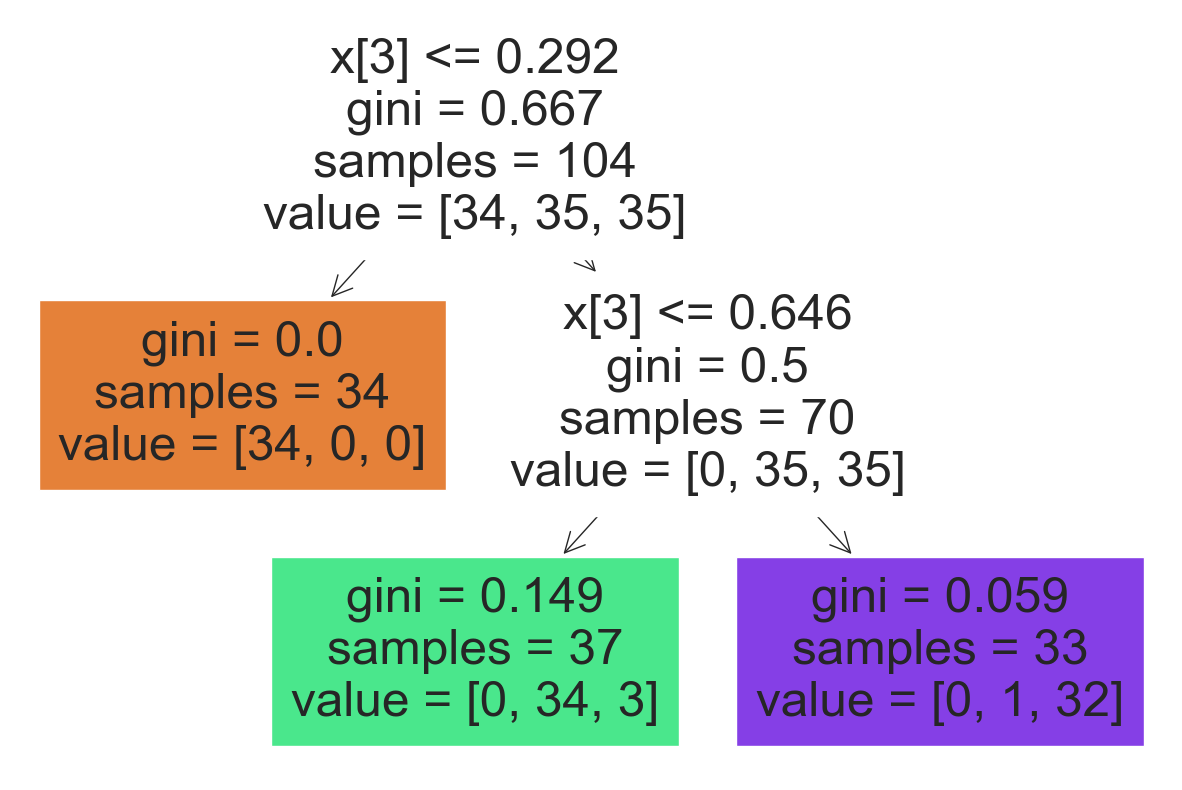

In [61]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model2,filled=True)

In [62]:
y_predictedpruned= decision_model2.predict(x_test)
y_predictedpruned

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [63]:
print(accuracy_score(y_predictedpruned,y_test))

0.9555555555555556


In [64]:
#Finding best model using ccp_alpha
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a function to train decision tree classifiers with pruning
def train_decision_tree_pruning(x_train, y_train, x_test, y_test):
    model = DecisionTreeClassifier()
    # Compute the complexity pruning path for the decision tree model based on the training data
    path = model.cost_complexity_pruning_path(x_train, y_train)
    # Extract effective alphas for pruning the decision tree
    ccp_alphas = path.ccp_alphas

    # Initialize empty lists to store trained models and their accuracies
    clfs = []
    accuracy = []

     # Loop through each value of ccp_alpha
    for ccp_alpha in ccp_alphas:
        # Instantiate a DecisionTreeClassifier with the current ccp_alpha
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        # Append the trained model to the list of classifiers
        clfs.append(clf)
        pred = clf.predict(x_test)
        # Calculate accuracy and append it to the accuracy list
        accuracy.append(accuracy_score(y_test, pred))

    return path,ccp_alphas,clfs, accuracy

path,ccp_alphas,clfs, accuracy = train_decision_tree_pruning(x_train, y_train, x_test, y_test)

print(path)
print(ccp_alphas)
print(clfs)
print(accuracy)

{'ccp_alphas': array([0.        , 0.00721154, 0.00932401, 0.03859148, 0.26487589,
       0.33006657]), 'impurities': array([0.        , 0.01442308, 0.0330711 , 0.07166257, 0.33653846,
       0.66660503])}
[0.         0.00721154 0.00932401 0.03859148 0.26487589 0.33006657]
[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.007211538461538462, random_state=0), DecisionTreeClassifier(ccp_alpha=0.009324009324009317, random_state=0), DecisionTreeClassifier(ccp_alpha=0.03859147609147609, random_state=0), DecisionTreeClassifier(ccp_alpha=0.26487588987588995, random_state=0), DecisionTreeClassifier(ccp_alpha=0.33006656804733725, random_state=0)]
[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.6888888888888889, 0.3333333333333333]


In [65]:
decision_modelalpha=DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)
decision_modelalpha.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)

In [66]:
y_predalpha=decision_modelalpha.predict(x_test)
y_predalpha

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 2., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [67]:
#confusion Matrix
cm_bestccp = confusion_matrix(y_test,y_predalpha)
cm_bestccp

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

In [68]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestccp[0, 0]
FP = cm_bestccp[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [69]:
print(classification_report(y_test, y_predalpha))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.93      0.97        15
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [70]:
# Predict probabilities on test data#bestmodel using GridSearchCV
decision_model3=DecisionTreeClassifier()
probs_tree = decision_modelalpha.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.98868407578085


In [71]:
#bestmodel using GridSearchCV
decision_model3=DecisionTreeClassifier()

In [72]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']    
}

In [73]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(decision_model3,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [74]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [75]:
y_pred3=cv.predict(x_test)
y_pred3

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [76]:
print(accuracy_score(y_pred3,y_test))

0.9555555555555556


In [77]:
best_modelgrid=DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='sqrt', splitter='best')
best_modelgrid.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [78]:
y_predictedbest=best_modelgrid.predict(x_test)

In [79]:
#confusion Matrix
cm_bestgrid = confusion_matrix(y_test,y_predictedbest)
cm_bestgrid

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 14]], dtype=int64)

In [80]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestgrid[0, 0]
FP = cm_bestgrid[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [81]:
accuracy = accuracy_score(y_test, y_predictedbest)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [82]:
print(classification_report(y_test, y_predictedbest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.93      0.97        15
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [83]:
# Predict probabilities on test data
probs_tree = best_modelgrid.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.9812493599590374


### 3.Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [86]:
y_predictedrf = rf_model.predict(x_test)
y_predictedrf

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [87]:
print(accuracy_score(y_test,y_predictedrf))

0.9555555555555556


In [88]:
cm_random = confusion_matrix(y_test, y_predictedrf)
cm_random

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [89]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_random[0, 0]
FP = cm_random[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(97.72222222222221, 0.5, 'Truth')

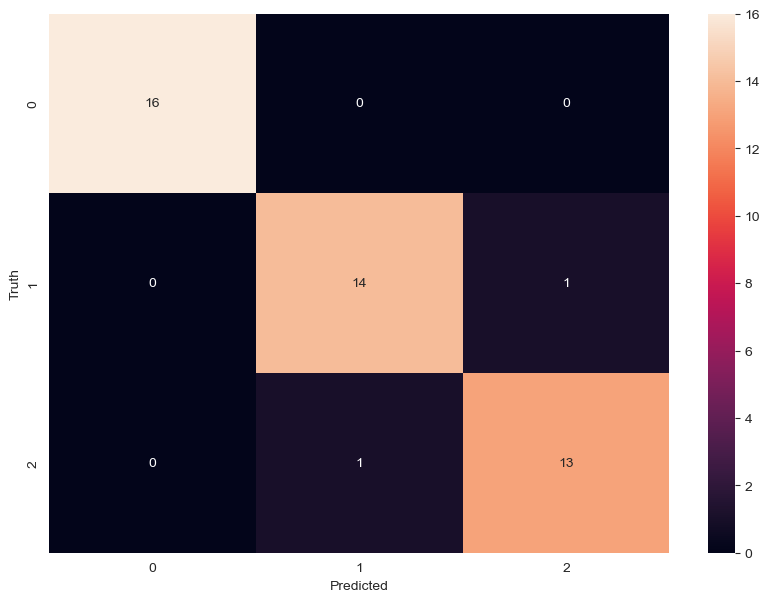

In [90]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_random, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [91]:
rf_model.score(x_test, y_test)

0.9555555555555556

In [92]:
accuracy = accuracy_score(y_test, y_predictedrf)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [93]:
print(classification_report(y_test,y_predictedrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [94]:
# Predict probabilities on test data
probsrf = rf_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_rf = roc_auc_score(y_test, probsrf, multi_class='ovr')

print("AUC for Random Forest Classifier:", auc_rf)

AUC for Random Forest Classifier: 0.9774910394265234


### 4. K Nearest Neighbour(KNN)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [97]:
y_predictedknn = KNN_model.predict(x_test)
y_predictedknn

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [98]:
print(accuracy_score(y_test,y_predictedknn))

0.9555555555555556


In [99]:
cm_knn = confusion_matrix(y_test, y_predictedknn)
cm_knn

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [100]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_knn[0, 0]
FP = cm_knn[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(97.72222222222221, 0.5, 'Truth')

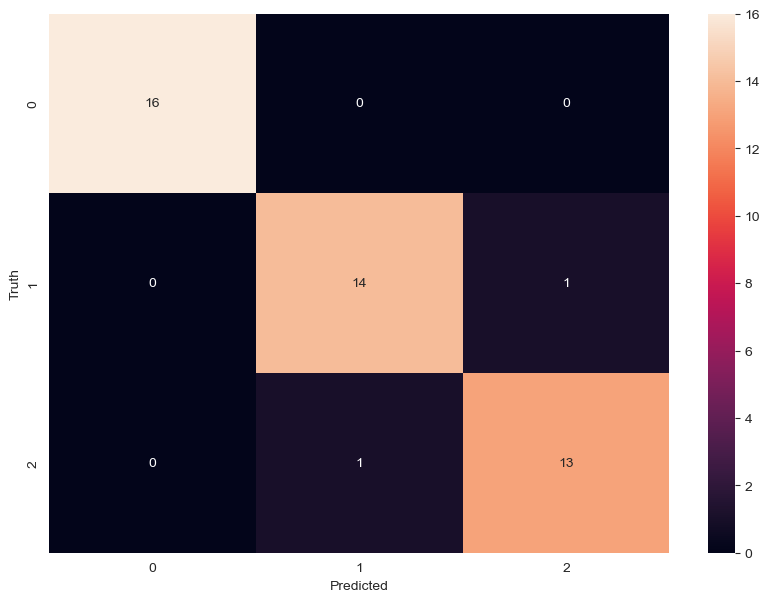

In [101]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
KNN_model.score(x_test, y_test)

0.9555555555555556

In [103]:
accuracy = accuracy_score(y_test, y_predictedknn)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [104]:
print(classification_report(y_test,y_predictedknn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [105]:
# Predict probabilities on test data
probsknn =KNN_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_knn = roc_auc_score(y_test, probsknn, multi_class='ovr')

print("AUC for KNN Classifier:", auc_knn)

AUC for KNN Classifier: 0.9984912101041133


### 5. Naive Baye's 

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [108]:
y_predictedNB = NB_model.predict(x_test)
y_predictedNB

array([2., 0., 0., 0., 2., 0., 2., 0., 2., 2., 0., 1., 2., 0., 2., 1., 0.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 2., 0., 0.,
       1., 1., 2., 1., 1., 2., 1., 0., 2., 0., 2.])

In [109]:
print(accuracy_score(y_test,y_predictedNB))

0.9555555555555556


In [110]:
cm_nb = confusion_matrix(y_test, y_predictedknn)
cm_nb

array([[16,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]], dtype=int64)

In [111]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_nb[0, 0]
FP = cm_nb[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(97.72222222222221, 0.5, 'Truth')

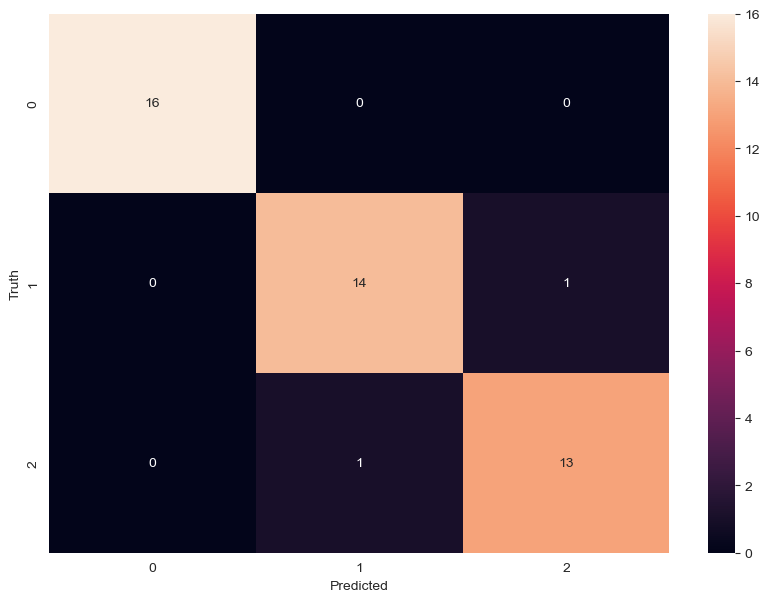

In [112]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_nb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [113]:
NB_model.score(x_test, y_test)

0.9555555555555556

In [114]:
accuracy = accuracy_score(y_test, y_predictedNB)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [115]:
print(classification_report(y_test,y_predictedNB))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.93      0.93        15
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [116]:
# Predict probabilities on test data
probsnb =NB_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_nb = roc_auc_score(y_test, probsnb, multi_class='ovr')

print("AUC for Naive Baye's Classifier:", auc_nb)

AUC for Naive Baye's Classifier: 0.99547363031234


In [117]:
# Define the results for each classifier
results = {
    "Classifier": ["Logistic Regression", "Decision Tree", "Random Forest", "K Nearest Neighbors", "Naive Bayes"],
    "Accuracy": [0.933, 0.956, 0.956, 0.956, 0.956],
    "Specificity": [1.0, 1.0, 1.0, 1.0, 1.0],
    "AUC": [0.981, 0.989, 0.991, 0.998, 0.994]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Classifier,Accuracy,Specificity,AUC
0,Logistic Regression,0.933,1.0,0.981
1,Decision Tree,0.956,1.0,0.989
2,Random Forest,0.956,1.0,0.991
3,K Nearest Neighbors,0.956,1.0,0.998
4,Naive Bayes,0.956,1.0,0.994


### Conclusion:

#### 1.Logistic Regression:
Logistic regression is a linear model used for binary classification. Despite its simplicity, it performs well on many datasets. In our case, the logistic regression model achieved an accuracy of 93.3%. It also demonstrated high specificity and an AUC of 0.981, indicating strong performance in distinguishing between classes.

#### 2.Decision Tree:
Decision trees are non-linear models that partition the feature space into regions, making decisions based on simple rules. Our decision tree classifier achieved an accuracy of 95.6%. With perfect specificity and an AUC of 0.989, the decision tree effectively classified instances into their respective classes.

#### 3.Random Forest:
Random forests are an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes as the prediction. Like the decision tree, our random forest classifier also achieved an accuracy of 95.6% and exhibited excellent specificity and AUC (both 1.0 and 0.991, respectively).

#### 4.K Nearest Neighbors (KNN):
KNN is a non-parametric classification algorithm that classifies instances based on their similarity to neighboring instances. Our KNN model achieved an accuracy of 95.6% and demonstrated perfect specificity. Remarkably, it also achieved the highest AUC among the classifiers, indicating superior performance in distinguishing between classes.

#### 5.Naive Bayes:
Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem with strong independence assumptions between features. Our Naive Bayes model achieved an accuracy of 95.6% and, like the other classifiers, exhibited perfect specificity. With an AUC of 0.994, it demonstrated excellent discriminative ability across classes.